# Overfitting

*In which we practice one thing so much that we get worse at everything else.*


### Define Constants


In [18]:
CACHE_FILE = '../cache/crabs.json'
NEXT_NOTEBOOK = '../1-models/models.ipynb'

PREDICTION_TARGET = 'Age'    # 'Age' is predicted
DATASET_COLUMNS = ['Sex','Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight',PREDICTION_TARGET]
REQUIRED_COLUMNS = [PREDICTION_TARGET]


### Importing Libraries


In [19]:
from notebooks.time_for_crab.mlutils import data_downcasting, display_df

import keras
import numpy as np
import pandas as pd

#from sklearn.svm import SVC
#from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

try:
    # for visual mode. `pip install -e .[visual]`
    import matplotlib.pyplot as plt
    import matplotlib
    %matplotlib inline
    import seaborn as sns
except ModuleNotFoundError:
    plt = None
    sns = None

pd.set_option('mode.copy_on_write', True)


### Load Data from Cache

In the [previous section](../0-eda/eda.ipynb), we saved the cleaned data to a cache file. Let's load it back.


In [20]:
crabs = pd.read_json(CACHE_FILE)
display_df(crabs, show_info=True)


DataFrame shape: (3893, 11)
First 5 rows:
     Length  Diameter    Height     Weight  Shucked Weight  Viscera Weight  \
0  1.437500  1.174805  0.412598  24.640625       12.335938        5.585938   
1  0.887695  0.649902  0.212524   5.402344        2.296875        1.375000   
2  1.037109  0.774902  0.250000   7.953125        3.232422        1.601562   
3  1.174805  0.887695  0.250000  13.476562        4.750000        2.281250   
4  0.887695  0.662598  0.212524   6.902344        3.458984        1.488281   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.746094    9   True  False  False  
1      1.559570    6  False  False   True  
2      2.763672    6  False   True  False  
3      5.246094   10   True  False  False  
4      1.701172    6  False   True  False  
<class 'pandas.core.frame.DataFrame'>
Index: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-nul

### Memory Reduction

Crabs were never known for their memory. Let's minimize the memory of our DataFrame using the smallest data types to fit the data.

The reason for this is to save computational resources and time. The smaller the data, the faster the processing.


In [21]:
crabs = data_downcasting(crabs)
display_df(crabs, show_info=True)


Memory usage of dataframe is 0.2784 MB (before)
Memory usage of dataframe is 0.0965 MB (after)
Reduced 65.3%
DataFrame shape: (3893, 11)
First 5 rows:
     Length  Diameter    Height     Weight  Shucked Weight  Viscera Weight  \
0  1.437500  1.174805  0.412598  24.640625       12.335938        5.585938   
1  0.887695  0.649902  0.212524   5.402344        2.296875        1.375000   
2  1.037109  0.774902  0.250000   7.953125        3.232422        1.601562   
3  1.174805  0.887695  0.250000  13.476562        4.750000        2.281250   
4  0.887695  0.662598  0.212524   6.902344        3.458984        1.488281   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.746094    9   True  False  False  
1      1.559570    6  False  False   True  
2      2.763672    6  False   True  False  
3      5.246094   10   True  False  False  
4      1.701172    6  False   True  False  
<class 'pandas.core.frame.DataFrame'>
Index: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column   

## Overfitting Crab Age

![Large mud crab measure](https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/CSIRO_ScienceImage_10696_Mud_crabs_are_caught_measured_tagged_and_released_as_part_of_the_research_into_the_effectiveness_of_green_zones_in_Moreton_Bay.jpg/1920px-CSIRO_ScienceImage_10696_Mud_crabs_are_caught_measured_tagged_and_released_as_part_of_the_research_into_the_effectiveness_of_green_zones_in_Moreton_Bay.jpg)


### Overfitting Goals and Methods 

The goal here is to show how complex of a model it will take to overfit the data.

We will use the following methods to overfit the data:

1. **Linear Regression**: Gradually increase the complexity of a linear regression model.
2. **Model Stacking**: Stack models to overfit the model.

> There are two steps in your single-variable linear regression model:  
>    1. Normalize the 'Horsepower' input features using the tf.keras.layers.Normalization preprocessing layer.
>    2. Apply a linear transformation ($y = mx + b$) to produce 1 output using a linear layer (tf.keras.layers.Dense).
>
> https://www.tensorflow.org/tutorials/keras/regression#linear_regression_with_one_variable 

Instead of 'Horsepower', we'll use 'Shell Weight' as the regression variable.


In [25]:
crabs = data_downcasting(crabs)
display_df(crabs, show_info=True)


Memory usage of dataframe is 0.0965 MB (before)
Memory usage of dataframe is 0.0965 MB (after)
Reduced 0.0%
DataFrame shape: (3893, 11)
First 5 rows:
     Length  Diameter    Height     Weight  Shucked Weight  Viscera Weight  \
0  1.437500  1.174805  0.412598  24.640625       12.335938        5.585938   
1  0.887695  0.649902  0.212524   5.402344        2.296875        1.375000   
2  1.037109  0.774902  0.250000   7.953125        3.232422        1.601562   
3  1.174805  0.887695  0.250000  13.476562        4.750000        2.281250   
4  0.887695  0.662598  0.212524   6.902344        3.458984        1.488281   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.746094    9   True  False  False  
1      1.559570    6  False  False   True  
2      2.763672    6  False   True  False  
3      5.246094   10   True  False  False  
4      1.701172    6  False   True  False  
<class 'pandas.core.frame.DataFrame'>
Index: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column    

### Normalize Shell Weight

This accounts for the effect of outliers on the variance of the data.
 

In [35]:
shell_weight = np.array(crabs['Shell Weight'])
shell_weight_normalizer = keras.layers.Normalization(axis=None)
shell_weight_normalizer.adapt(shell_weight)


### Build the Shell Weight Model

This is a simple linear regression model that predicts the age of a crab based on its shell weight. It remains untrained.


In [36]:
shell_weight_model = keras.Sequential([
    keras.layers.Input(shape=(1,)),
    shell_weight_normalizer,
    keras.layers.Dense(units=1)
])

shell_weight_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_10                │ (None, 1)              │             3 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

### Predict Before Training (For Science)

We don't expect good results here. This is just to get a baseline.


In [37]:
shell_weight_model.predict(shell_weight[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[ 0.02125543],
       [ 2.1921709 ],
       [ 1.6881719 ],
       [ 0.64910823],
       [ 2.132901  ],
       [-0.18148871],
       [ 0.8273269 ],
       [-0.1520581 ],
       [-1.4453694 ],
       [ 1.9726676 ]], dtype=float32)

### Compile the Model

We will use the mean squared error as the loss function and the Adam optimizer.


In [38]:
shell_weight_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)


### Train the Model

Let's train for 100 epochs.


In [40]:
%%time
history = shell_weight_model.fit(
    x=crabs['Shell Weight'],
    y=crabs[PREDICTION_TARGET],
    epochs=100,
    verbose=0,
    validation_split=0.2
)


CPU times: total: 1.97 s
Wall time: 7.81 s


### Plot the Training History


In [41]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()


,loss,val_loss,epoch
95,6.396558,6.171331,95
96,6.421682,6.202165,96
97,6.389221,6.188575,97
98,6.393003,6.216843,98
99,6.418506,6.186303,99


### Plot the Loss History


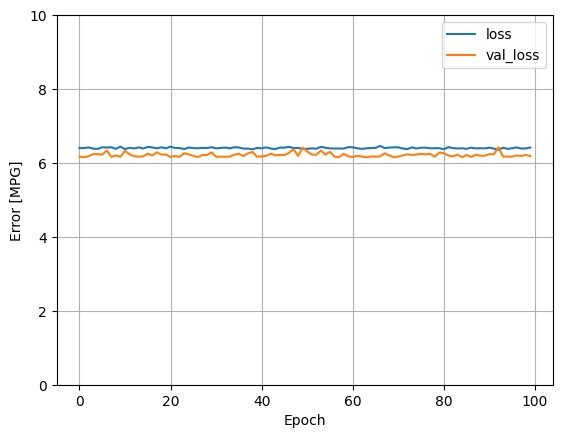

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)


### Don't Save this Data

We don't want our over-trained model to leak into the [next step](../1-models/models.ipynb).


### Onwards to Model Selection

See the [next section](../1-models/models.ipynb) for model selection.
